In [179]:
# maths
from numpy import sin, cos, arctan, pi, matrix, exp, array
from numpy.linalg import eig, solve

# plotting
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['font.size'] = 10
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from mpl_toolkits.mplot3d import axes3d

In [87]:
P = matrix([0.8, 0.3]).T
theta = -pi / 4               # negative angles go counter-clockwise

In [88]:
P

matrix([[0.8],
        [0.3]])

In [101]:
P.shape

(2, 1)

In [89]:
R = matrix([[cos(theta), sin(theta)],
            [-sin(theta), cos(theta)]])

In [90]:
R

matrix([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]])

In [91]:
Pprime = R * P

In [92]:
Pprime[0, 0]

0.35355339059327384

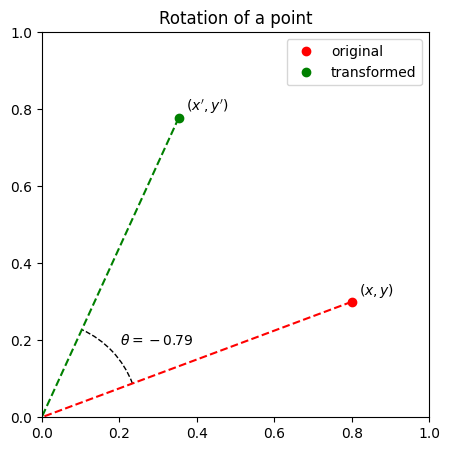

In [93]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# draw lines to the origin
ax.plot([P[0, 0], 0.0], [P[1, 0], 0.0], color='red', linestyle='dashed')
ax.plot([Pprime[0, 0], 0.0], [Pprime[1, 0], 0.0], color='green', linestyle='dashed')
ax.annotate("$(x, y)$", P, xytext=[5, 5], textcoords='offset points')
ax.annotate("$(x', y')$", Pprime, xytext=[5, 5], textcoords='offset points')

# plot the points
ax.plot(P[0, 0], P[1, 0], 'ro', label='original')
ax.plot(Pprime[0, 0], Pprime[1, 0], 'go', label='transformed')

# draw and label the angle arc
arcrad = 0.25                                    # the radius of the arc
rad2deg = 2 * pi / 360                           # matplotlib works in degrees, annoyingly
theta1 = arctan(P[1, 0] / P[0, 0])
theta2 = arctan(Pprime[1, 0] / Pprime[0, 0])
ax.add_patch(Arc([0.0, 0.0],                     # the centre of the arc (the origin)
                 2 * arcrad, 2 * arcrad,         # the arc's diameter (not radius) along each axis
                 theta1=theta1 / rad2deg,        # starting angle (in degrees)
                 theta2=theta2 / rad2deg,        # ending angle (in degrees)
                color='black', linestyle='dashed'))
midtheta = (theta1 + ((theta2 - theta1) / 2))    # the angle at the centre of the arc
xytext = [(arcrad * 1.1) * cos(midtheta),        # sit the label slightly out from the arc
          (arcrad * 1.1) * sin(midtheta)]
ax.annotate(f'$\\theta = {theta:.2f}$', xytext)
    
# set title and axis limits
ax.set_title('Rotation of a point')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.legend(loc='upper right')
plt.savefig('rot.png')
plt.show()

In [96]:
eig(R)

EigResult(eigenvalues=array([0.70710678+0.70710678j, 0.70710678-0.70710678j]), eigenvectors=matrix([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

In [99]:
exp((0+1j) * theta)

(0.7071067811865476-0.7071067811865475j)

In [100]:
eig(R).eigenvectors

matrix([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]])

## Decaying case

In [169]:
A = matrix([[0.5, 1], [-0.85, -0.025]])

In [170]:
A

matrix([[ 0.5  ,  1.   ],
        [-0.85 , -0.025]])

In [171]:
es = eig(A)

In [172]:
es

EigResult(eigenvalues=array([0.2375+0.88379508j, 0.2375-0.88379508j]), eigenvectors=matrix([[ 0.73521462+0.j        ,  0.73521462-0.j        ],
        [-0.19299384+0.64977907j, -0.19299384-0.64977907j]]))

In [173]:
abs(es.eigenvalues)

array([0.91515026, 0.91515026])

In [174]:
es.eigenvectors[0]

matrix([[0.73521462+0.j, 0.73521462-0.j]])

In [183]:
solve(A, matrix([[0], [0]]))

matrix([[-0.],
        [ 0.]])

## Oscillating case

In [184]:
B = matrix([[0.5, 1], [-0.5, 1]])

In [185]:
bs = eig(B)

In [186]:
bs

EigResult(eigenvalues=array([0.75+0.66143783j, 0.75-0.66143783j]), eigenvectors=matrix([[0.81649658+0.j        , 0.81649658-0.j        ],
        [0.20412415+0.54006172j, 0.20412415-0.54006172j]]))

In [187]:
abs(es.eigenvalues)

array([0.91515026, 0.91515026])

In [188]:
F = matrix([[1, 1], [1, 0]])
eig(F)

EigResult(eigenvalues=array([ 1.61803399, -0.61803399]), eigenvectors=matrix([[ 0.85065081, -0.52573111],
        [ 0.52573111,  0.85065081]]))

In [189]:
solve(B, matrix([[0], [0]]))

matrix([[0.],
        [0.]])

## 3d example

\begin{align}
x_t &= x_{t - 1} - y_{t - 1} \\
y_t &= -x_{t - 1} - 3 y_{t - 1} + z_{t - 1} \\
z_t &= y_{t - 1} + z_{y - 1}
\end{align}

$$
A =
\left(
\begin{matrix}
1 & -1 & 0 \\
-1 & -3 & 1 \\
0 & 1 & 1
\end{matrix}
\right)
$$

In [104]:
A = matrix([[1, -1, 0],
            [-1, -3, 1],
            [0, 1, 1]])

In [105]:
a_eigs = eig(A)

In [106]:
a_eigs

EigResult(eigenvalues=array([-3.44948974,  1.        ,  1.44948974]), eigenvectors=matrix([[ 2.14186495e-01, -7.07106781e-01, -6.73887339e-01],
        [ 9.53020614e-01,  1.33504240e-17,  3.02905447e-01],
        [-2.14186495e-01, -7.07106781e-01,  6.73887339e-01]]))

In [107]:
abs(a_eigs.eigenvalues)

array([3.44948974, 1.        , 1.44948974])

In [124]:
a_eigs.eigenvectors

matrix([[ 2.14186495e-01, -7.07106781e-01, -6.73887339e-01],
        [ 9.53020614e-01,  1.33504240e-17,  3.02905447e-01],
        [-2.14186495e-01, -7.07106781e-01,  6.73887339e-01]])

In [103]:
sin(theta)

-0.7071067811865475

In [112]:
def timeSeries(x, y, z, x0, y0, z0, t):
    '''Create a time series of length t for three functions x, y, and z, starting
    from the given initial conditions. The equations are assumed to describe
    a first-order system.
    
    :param x: x(t) as a function of x(t - 1), y(t - 1), z(t - 1), aand t
    :param y: y(t) and a function of x(t - 1), y(t - 1), z(t - 1), aand t
    :param z: z(t) and a function of x(t - 1), y(t - 1), z(t - 1), and t
    :param x0: initial value of x
    :param y0: initial value of y
    :param z0: initial value of z
    :param t: number of timesteps
    :returns: four time series'''
    
    # initial conditions are the first elements of the time series
    xs = [ x0 ]
    ys = [ y0 ]
    zs = [ z0 ]
    
    # run through the times
    for i in range(1, t):
        xt = x(xs[-1], ys[-1], zs[-1], i)
        yt = y(xs[-1], ys[-1], zs[-1], i)
        zt = z(xs[-1], ys[-1], zs[-1], i)
        xs.append(xt)
        ys.append(yt)
        zs.append(zt)
        
    return (range(t), xs, ys, zs)

In [125]:
def a_x(x, y, z, t):
    return x - y

def a_y(x, y, z, t):
    return -x - 3 * y + z

def a_z(x, y, z, t):
    return y + z

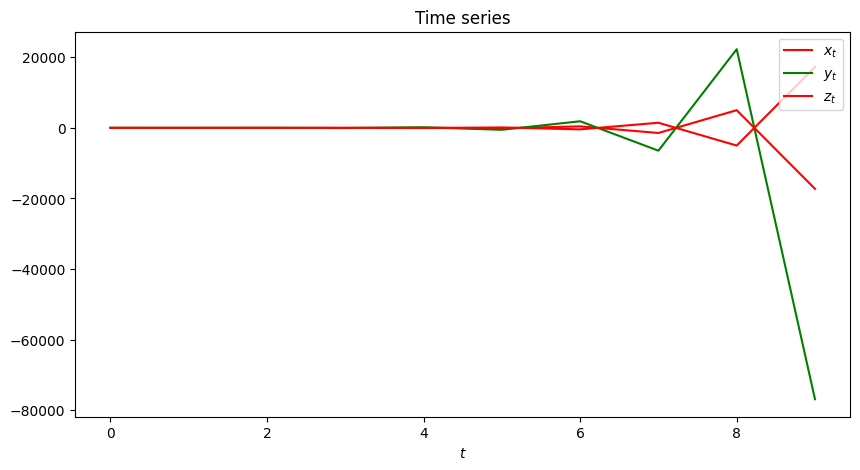

In [167]:
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()

# plot the time series
(ts, xs, ys, zs) = timeSeries(a_x, a_y, a_z, 2, 1, 1, 10)
ax.plot(ts, xs, 'r-', label='$x_t$')
ax.plot(ts, ys, 'g-', label='$y_t$')
ax.plot(ts, zs, 'r-', label='$z_t$')
    
 # set title and axis limits
ax.set_title('Time series')
ax.set_xlabel('$t$')
ax.legend(loc='upper right')
plt.show()

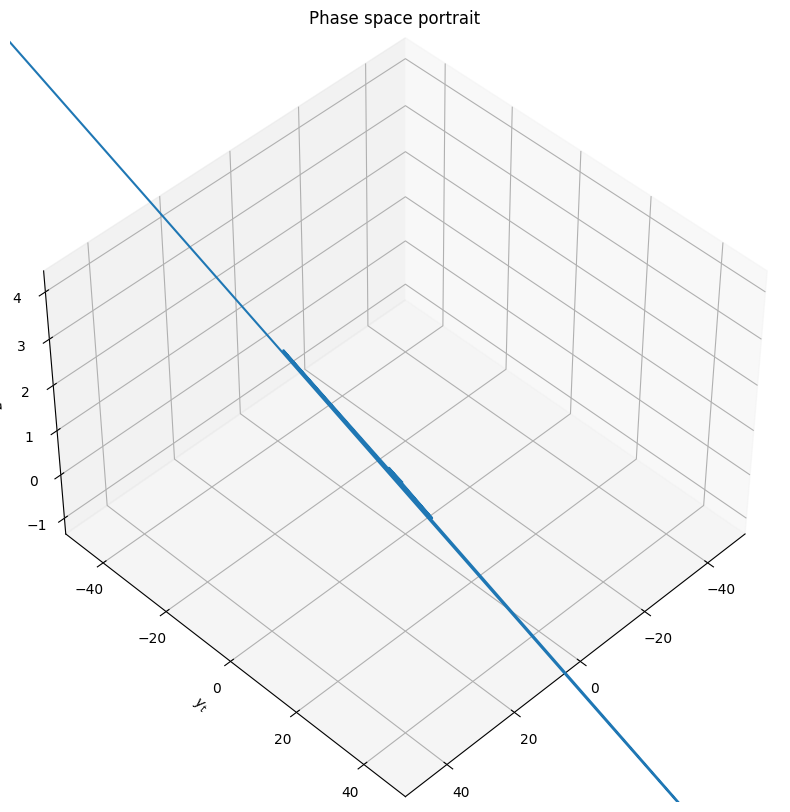

In [161]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# plot the time series
(ts, xs, ys, zs) = timeSeries(a_x, a_y, a_z, 2, 1, 1, 100)
ax.plot(xs, ys, zs)
    
ax.view_init(elev=45, azim=45, roll=0)

# set title and axis labels
ax.set_title('Phase space portrait')
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_xlim([-50, 50])
ax.set_zlabel('$x_t$')
ax.set_ylabel('$y_t$')
ax.set_zlabel('$z_t$')
plt.show()